# STREAM ONE: Data Pre-processing

In [214]:
#Importing the csv and json modules

import csv 
import json




    The codes below opens a csv file 'sample_data.csv', reads it and creates a list of dictionaries, 'customer_details'. The dictionaries are structured based on the rich structured specified below.

    Some customers' details do not have number of dependants. For such cases, dependant is set to zero and the indexes of the rows where such correction occured are printed below. Customer's dependant values are also converted from string to integer.


In [204]:

with open('sample_data.csv', mode = 'r', encoding = 'utf-8') as csv_file:
              
    csv_reader = csv.DictReader(csv_file)
    
    customer_details = [ ]


    # Loop through each row in the CSV file
    for row in csv_reader:
        
        #Type conversion from string to boolean
        if row['Retired'] == 'True':
            row['Retired'] = True
        else:
            row['Retired'] = False
            
                       
        details = {'First Name' : row['First Name'],
                   
                   'Last Name' : row['Last Name'],  
                                    
                   'Age(Years)' : int(row['Age (Years)']),
                   
                   'Sex' : row['Sex'], 
                   
                   'Marital Status' : row['Marital Status'],
                   
                   'Dependants' : row['Dependants'],        
                   
                   'Distance to Work(miles)' : float(row['Distance Commuted to Work (miles)']), 
                   
                   'Employer Company' : row['Employer Company'],
                   
                   'Yearly Salary(GBP)' : int(row['Yearly Salary (GBP)']),
                   
                   'Yearly Pension(GBP)' : int(row['Yearly Pension (GBP)']),
                   
                   'Retired' : row['Retired'],
                   
                   'Address' : {'Street' : row['Address Street'], 
                                'City' : row['Address City'], 
                                'PostCode' : row['Address Postcode']},
                   
                   'Credit Card' : {'Start Date' : row['Credit Card Start Date'], 
                                    'Expiry Date' : row['Credit Card Expiry Date'],
                                    'Number' : int(row['Credit Card Number']), 
                                    'CVV' : int(row['Credit Card CVV']), 
                                    'Bank IBAN' : row['Bank IBAN']}, 
                   
                   'Vehicle' : {'Make' : row['Vehicle Make'],
                                'Model' : row['Vehicle Model'],
                                'Year' : row['Vehicle Year'],
                                'Type' : row['Vehicle Type']}
            }
        
        
           
        
        #Appending or adding the details of each customer to the list.
        customer_details.append(details)
    
    

# Dependant error correction
miss_dep = []

for customer in customer_details:
    if customer['Dependants'] == '':
        customer['Dependants'] = '0'
        miss_dep.append(customer_details.index(customer))
        
    customer['Dependants'] = int(customer['Dependants'])
        

print(f'Indexes of rows where corrections occured: {miss_dep}')
    

Indexes of rows where corrections occured: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]



    A new json file 'refined_file.json' is creeated and the list of dictionaries 'customer_details' is written in it in json format with the code chunk below.


In [205]:
with open('refined_file.json', mode='w', encoding = 'utf-8') as json_file:
    json.dump(customer_details, json_file, indent = 4)

    
    Two json files are created - retired_customers_file.json and employed_customers_file.json. 'retired_customers_file.json' contains details of customers that are retired, while 'employed_customers_file.json' contains list of customers that are employed. 
    

In [206]:
retired_customers = []

for customer in customer_details:
    if customer['Retired'] == True:        
        retired_customers.append(customer)
        
        
        
with open('retired_customers_file.json', mode='w', encoding = 'utf-8') as retired_file:
    json.dump(retired_customers, retired_file, indent = 4)
        
        

In [207]:
employed_customers = []

for customer in customer_details:
    if customer['Employer Company'] != 'N/A':
        employed_customers.append(customer)
        
        
        
with open('employed_customers_file.json', mode='w', encoding = 'utf-8') as employed_file:
    json.dump(employed_customers, employed_file, indent = 4)
        
        

    
    The function below flags a customer if the validity period on his credit card is greater than 8 years.
        
    The function takes two auguments - one is a csv file containing customer's information, and the other is the row number of the customer to be checked.
    
    It will also store the customer information in a json file.
       

In [210]:

#function definition
def ccard_flag(csv_file, rnum):
    
    #modules import
    from datetime import datetime

    import csv
    
    #Actaul row number - indexed at zero
    rown = rnum - 1
    
    customer_csv = csv_file
    
    #opening the file and converting to csv object
    with open(customer_csv, mode = 'r', encoding = 'utf-8') as sing_csv:
              
        csv_single = csv.DictReader(sing_csv)
        
        #putting the object in a list
        rows = list(csv_single)
        
        row = rows[rown]
           
        date_1 = row['Credit Card Start Date']
        date_2 = row['Credit Card Expiry Date']
                
        start_date = datetime.strptime(date_1, '%m/%y').date()
        end_date = datetime.strptime(date_2, '%m/%y').date()

        duration_in_days = end_date - start_date
    
        duration_in_years = (duration_in_days.days) / 365 
        
        if duration_in_years > 8:
            with open('ccard_flag.json', mode = 'a', encoding = 'utf-8') as ccard_file:
                json.dump(row, ccard_file, indent = 4)
            return (f'Customer at row number {rnum} has more than 8 years validity period on his credit card.')
        else:
            return (f"Customer's information at row number {rnum} is okay.")
              



    
    The fuction is tested below.
    

In [212]:
customer_file = 'sample_data.csv'

info = ccard_flag(customer_file, 7)

print(info)

Customer at row number 7 has more than 8 years validity period on his credit card.


 
    Another attribute 'Salary_Commute' is created based on distance travelled to work. This is used to rank the customers. A new json file is created to save the new customers' records.
 

In [213]:

with open('refined_file.json', mode = 'r', encoding = 'utf-8') as salary_json:
    salary_data = json.load(salary_json)
    
    for data in salary_data:
        if data['Distance to Work(miles)'] > 1:
            data['Salary_Commute(GBP)'] = data['Yearly Salary(GBP)'] / data['Distance to Work(miles)']
        else:
            data['Salary_Commute(GBP)'] = data['Yearly Salary(GBP)']
    
    sorted_record = sorted(salary_data, key = lambda x: x['Salary_Commute(GBP)'], reverse = False)
                
with open('commute_file.json', mode = 'w', encoding = 'utf-8') as commute_json:
    json.dump(sorted_record, commute_json, indent = 4)
    

 
   
   # STREAM TWO: Data Visualisation with Pandas and Seaborn
   


In [215]:
#Data visualisation is done with original data

import pandas as pd
import seaborn as sb

user_data = pd.read_csv('sample_data.csv')


In [223]:

#Viewing the first 6 rows of the data set.

user_data.head(6)


,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
5,Studio 43M Emily rapid,West Derekborough,W1J 0DL,23,10.73,Gill and Sons,03/15,05/15,4485214746578045493,123,...,Clarke,married or civil partner,0,False,38100,Male,Lexus,Paceman,2004,Van/Minivan


In [224]:

#Viewing the last 6 rows of the data set.

user_data.tail(6)


,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
994,Flat 35h Kathleen extensions,Lake Owenmouth,G3 8PL,90,0.00,NaN,06/15,07/26,213131632975005,911,...,Sykes,single,15650,True,49928,Male,Nissan,Prizm,1994,Van/Minivan
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup
999,Flat 9 Mohamed route,West Glen,LL3M 4WS,80,0.00,NaN,12/14,01/16,180020306382110,903,...,Russell,single,22869,True,25788,Female,Geo,S7,1993,Van/Minivan


In [217]:

#Getting the descriptive statitics of the annual salary

user_data['Yearly Salary (GBP)'].describe()


count     1000.000000
mean     57814.078000
std      23270.417139
min      17046.000000
25%      39089.750000
50%      57518.000000
75%      77211.500000
max      98915.000000
Name: Yearly Salary (GBP), dtype: float64

In [225]:

#Getting the descriptive statitics of the Age

user_data['Age (Years)'].describe()


count    1000.000000
mean       54.302000
std        21.319646
min        18.000000
25%        36.000000
50%        54.000000
75%        72.000000
max        91.000000
Name: Age (Years), dtype: float64

In [228]:

#Getting the average distance travelled to work.

ave_dist = user_data['Distance Commuted to Work (miles)'].mean()

print(f'Average Commute Distance: {ave_dist} miles')


Average Commute Distance: 10.457769999999993 miles


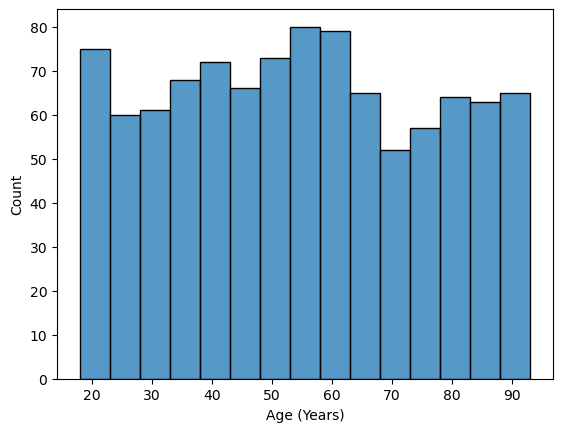

In [229]:

#Plotting the Age distribution

age_plot = sb.histplot(user_data['Age (Years)'], binwidth = 5)


In [231]:

# The number of bins are calculated as follows
bin_no = len(age_plot.patches)

print(f'Number of Bins: {bin_no}')


Number of Bins: 15


<AxesSubplot:xlabel='Dependants', ylabel='Count'>

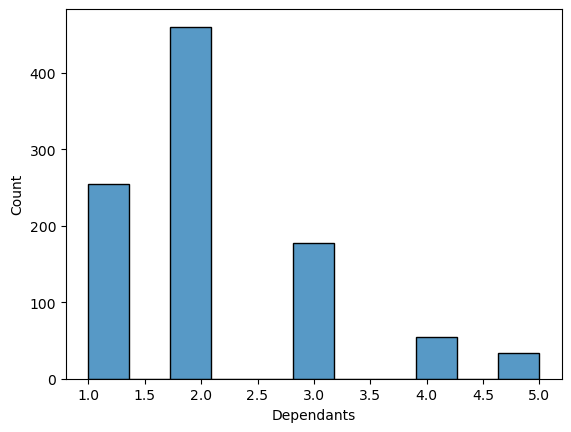

In [202]:
#Histogram plot of Dependants

sb.histplot(user_data['Dependants'])


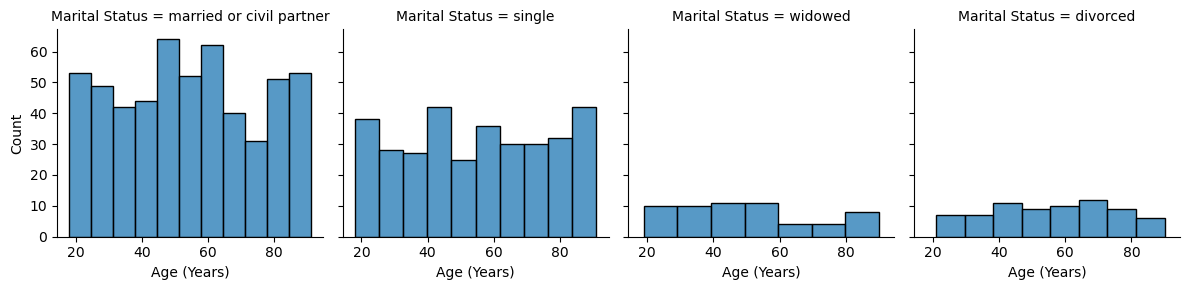

In [171]:
#Univariate plot of the Age conditioned on Marital Status.

age_marital = sb.FacetGrid(user_data, col = 'Marital Status')

age_marital.map(sb.histplot, 'Age (Years)')



<AxesSubplot:xlabel='Distance Commuted to Work (miles)', ylabel='Yearly Salary (GBP)'>

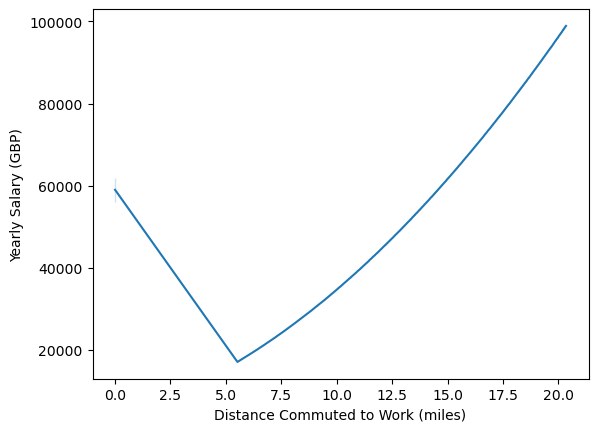

In [195]:
#Plot of Distance against Salary

sb.lineplot(x = 'Distance Commuted to Work (miles)'y = 'Yearly Salary (GBP)', data = user_data)


<AxesSubplot:xlabel='Age (Years)', ylabel='Yearly Salary (GBP)'>

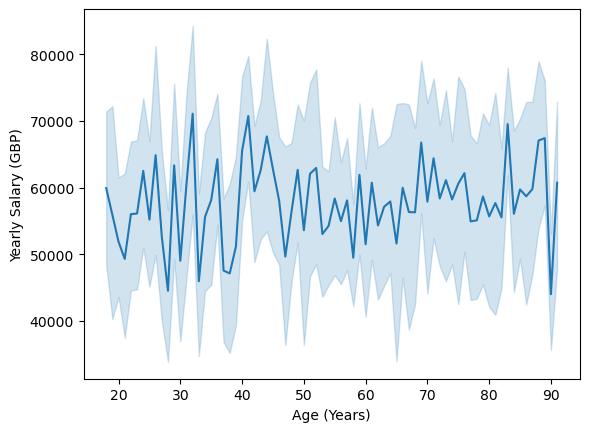

In [201]:
#Plot of Age aginst Salary

sb.lineplot(x = 'Age (Years)', y = 'Yearly Salary (GBP)', data = user_data)


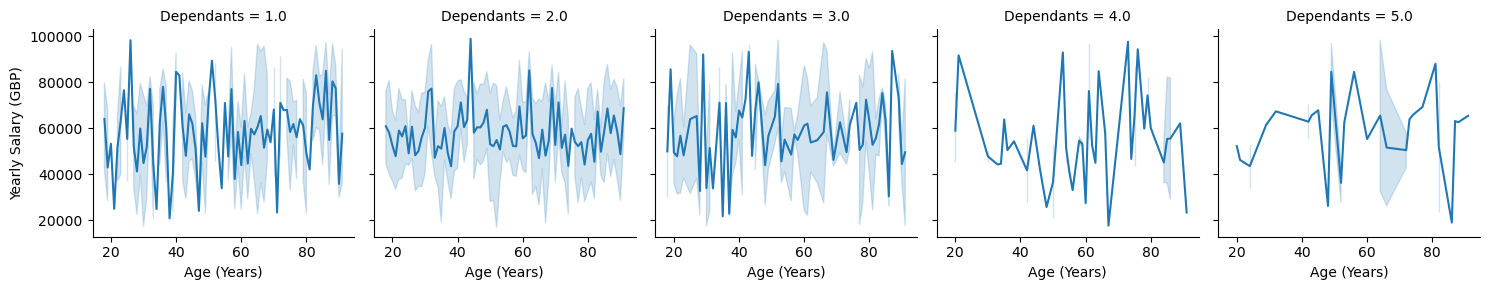

In [200]:
#Age against Salary conditioned by Dependants

age_salary = sb.FacetGrid(data = user_data, col = 'Dependants')

age_salary.map(sb.lineplot, 'Age (Years)', 'Yearly Salary (GBP)')
